# Interpolation par collocation

L'interpolation polynomiale consiste à faire passer un polynôme de degré n passant par les (n + 1) points
de collocation $(x_i, y_i)$ pour $i \in [0, n]$ :
$$y_i = P_n(x_i) =  \sum_{j=0}^n a_j x_i^j$$

## Approche par matrice de Vandermonde

L'approche la plus directe revient à résoudre un système d'équations linéaires où intervient la matrice de Vandermonde: 

$$
\left(
\begin{array}{c c c c}
x_{0}^0   & x_{0}^1   & \cdots & x_{0}^n \\
x_{1}^0   & x_{1}^1   & \cdots & x_{1}^n \\
\vdots         & \vdots         & \ddots & \vdots \\
x_{n}^0   & x_{n}^1   & \cdots & x_{n}^n \\
\end{array}
\right)
\left(
\begin{array}{c}
a_0 \\ a_1 \\ \vdots \\ a_n
\end{array}
\right)
=
\left(
\begin{array}{c}
y_0 \\ y_1 \\ \vdots \\ y_n
\end{array}
\right)
$$

## Interpolation de Lagrange

L'interpolation de Lagrange est une approche plus élégante et souvent plus stable numériquement que la résolution du système de Vandermonde, tout en évitant les problèmes de conditionnement de cette matrice.

### Définition des polynômes de base de Lagrange

Pour un ensemble de points de collocation $(x_0, y_0), (x_1, y_1), \ldots, (x_n, y_n)$ avec des abscisses $x_i$ distinctes, on définit les **polynômes de base de Lagrange** $L_i(x)$ pour $i = 0, 1, \ldots, n$ par :

$$L_i(x) = \prod_{\substack{j=0 \\ j \neq i}}^n \frac{x - x_j}{x_i - x_j}$$

Ces polynômes possèdent la propriété fondamentale suivante :
$$L_i(x_k) = \delta_{ik} = \begin{cases} 
1 & \text{si } k = i \\
0 & \text{si } k \neq i 
\end{cases}$$

### Écriture explicite des polynômes de Lagrange

Pour clarifier, le polynôme $L_i(x)$ s'écrit explicitement :

$$L_i(x) = \frac{(x - x_0)(x - x_1) \cdots (x - x_{i-1})(x - x_{i+1}) \cdots (x - x_n)}{(x_i - x_0)(x_i - x_1) \cdots (x_i - x_{i-1})(x_i - x_{i+1}) \cdots (x_i - x_n)}$$

### Formule d'interpolation de Lagrange

Le **polynôme d'interpolation de Lagrange** $P_n(x)$ de degré au plus $n$ passant par les $(n+1)$ points donnés s'écrit :

$$P_n(x) = \sum_{i=0}^n y_i L_i(x)$$

ou de manière plus explicite :

$$P_n(x) = \sum_{i=0}^n y_i \prod_{\substack{j=0 \\ j \neq i}}^n \frac{x - x_j}{x_i - x_j}$$

### Propriétés et avantages

Cette formulation présente plusieurs avantages par rapport à l'approche matricielle :

- **Pas de résolution de système** : on obtient directement l'expression du polynôme
- **Interprétation géométrique claire** : chaque terme $y_i L_i(x)$ contribue à la valeur finale
- **Stabilité numérique** généralement meilleure pour des points bien espacés
- **Facilité d'ajout de nouveaux points** : pas besoin de recalculer entièrement

### Exemple illustratif

Pour trois points $(x_0, y_0)$, $(x_1, y_1)$, $(x_2, y_2)$, les polynômes de base sont :

$$L_0(x) = \frac{(x - x_1)(x - x_2)}{(x_0 - x_1)(x_0 - x_2)}$$

$$L_1(x) = \frac{(x - x_0)(x - x_2)}{(x_1 - x_0)(x_1 - x_2)}$$

$$L_2(x) = \frac{(x - x_0)(x - x_1)}{(x_2 - x_0)(x_2 - x_1)}$$

Et le polynôme d'interpolation s'écrit :
$$P_2(x) = y_0 L_0(x) + y_1 L_1(x) + y_2 L_2(x)$$

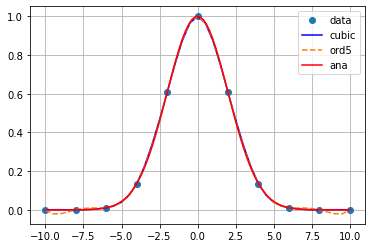

In [2]:
#%matplotlib inline
import math
import matplotlib.pyplot as plt
import numpy as np
from scipy.interpolate import interp1d

a=1/8
def f(x):
    return np.exp(-a*x**2)

x = np.linspace(-10, 10, num=11, endpoint=True)
y = f(x)

interpf  = interp1d(x, y, kind='cubic')

ord=5
interpfn = interp1d(x, y, kind=ord)

xnew = np.linspace(-10, 10, num=41, endpoint=True)
ynew=interpfn(xnew)

plt.plot(x, y, 'o', xnew, interpf(xnew), 'b-', xnew, interpfn(xnew), '--')

x = np.linspace(-10, 10, num=101, endpoint=True)
y = f(x)
plt.plot(x, y, 'r-')
plt.legend(['data', 'cubic', 'ord'+str(ord), 'ana'], loc='best')
plt.grid()


Exercice : déterminer l'interpolée d'ordre $n \in [5, 10]$,  passant par (n+1) points d'abscisses équidistantes dans l'intervalle $x_i \in [0, 2 \pi]$ et d'ordonnées $y_i = \sin(x_i)$

Exercice : faites de même avec des ordonnées bruitées avec un bruit blanc. On utilisera np.random.rand(x.shape[0])
avec une amplitude de 0.1 . Commenter

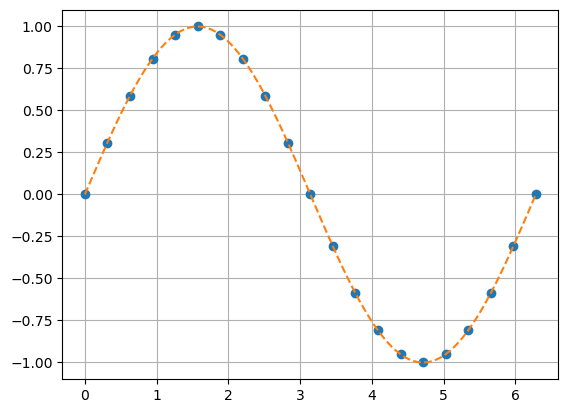

In [5]:
#%matplotlib inline
import math
import matplotlib.pyplot as plt
import numpy as np
from scipy.interpolate import interp1d

xinf, xsup = 0, 2*np.pi
nsamples = 21
x = np.linspace(xinf, xsup, num=nsamples, endpoint=True)
y = np.sin(x)

ord=15
interpfn = interp1d(x, y, kind=ord)

xnew = np.linspace(xinf, xsup, num=101, endpoint=True)
ynew=interpfn(xnew)

plt.plot(x, y, 'o', xnew, interpfn(xnew), '--')
plt.grid()

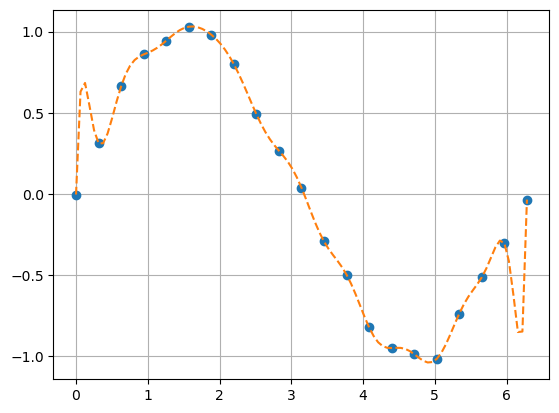

In [8]:
#%matplotlib inline
import math
import matplotlib.pyplot as plt
import numpy as np
from scipy.interpolate import interp1d

xinf, xsup = 0, 2*np.pi
nsamples = 21
b = 0.1
x = np.linspace(xinf, xsup, num=nsamples, endpoint=True)
y = np.sin(x) + b*(2*np.random.rand(x.shape[0])-1)

ord=11
interpfn = interp1d(x, y, kind=ord)

xnew = np.linspace(xinf, xsup, num=101, endpoint=True)
ynew=interpfn(xnew)

plt.plot(x, y, 'o', xnew, ynew, '--')
plt.grid()

### Interpolation de Chebyshev

L’interpolation de Chebyshev est une méthode d’approximation polynomiale qui utilise des **polynômes de Chebyshev** comme base, et des **nœuds de Chebyshev** pour échantillonner la fonction à interpoler. Elle permet de minimiser l’effet de **Runge** (fortes oscillations aux bords de l’intervalle) observé avec l’interpolation sur des points également espacés.

Les **nœuds de Chebyshev** d'ordre $n$ sur l’intervalle $[-1, 1]$ sont définis par :

$$
x_k = \cos\left( \frac{(2k+1)\pi}{2(n+1)} \right), \quad k = 0, \dots, n
$$

Soit $f$ une fonction définie sur $[-1, 1]$. L’interpolant de Chebyshev $ P_n(x) $ est le polynôme de degré au plus $ n $ tel que :

$$
P_n(x_k) = f(x_k) \quad \text{pour } k = 0, \dots, n
$$

Ce polynôme peut être exprimé comme une combinaison linéaire des **polynômes de Chebyshev de première espèce** $ T_k(x)$ :

$$
P_n(x) = \sum_{k=0}^{n} a_k T_k(x)
$$

où les coefficients $ a_k $ peuvent être calculés efficacement grâce à la transformée de Chebyshev discrète.

Cette interpolation est particulièrement précise pour les fonctions régulières, et largement utilisée en calcul spectral et en analyse numérique.


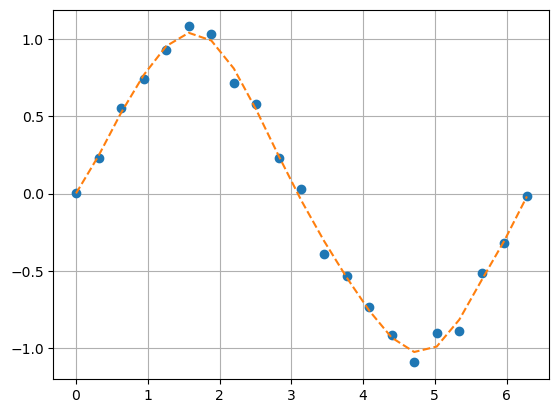

In [12]:
#%matplotlib inline
import math
import matplotlib.pyplot as plt
import numpy as np
from numpy.polynomial.chebyshev import Chebyshev

xinf, xsup = 0, 2*np.pi
nsamples = 21
b = 0.1
x = np.linspace(xinf, xsup, num=nsamples, endpoint=True)
y = np.sin(x) + b*(2*np.random.rand(x.shape[0])-1)

# Supposons que x et y soient tes données
cheb_poly = Chebyshev.fit(x, y, deg=11)  # Ajuste un polynôme de degré 5

# Pour évaluer l'interpolation :
y_interpol = cheb_poly(x)

plt.plot(x, y, 'o', x, y_interpol, '--')
plt.grid()